In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#convert to DF, update price and date format
houseprices = pd.read_csv('House Prices.csv',thousands=',', parse_dates=True)
houseprices['Date'] = pd.to_datetime(houseprices['Date'])
houseprices['year'], houseprices['month'] = houseprices['Date'].dt.year, houseprices['Date'].dt.month

In [3]:
houseprices.head()

,Date,Price,Address,County,Province,year,month
0,2018-02-01,115000.0,"239 BLARNEY ST, CORK, CORK",Cork,Munster,2018,2
1,2018-02-01,361233.0,"3 CCOLROE COURT, BALLINCOLLIG",Cork,Munster,2018,2
2,2018-02-01,365000.0,"38 THE CRESCENT, CASTLE ROCK, BANESHANE",Cork,Munster,2018,2
3,2018-02-01,230000.0,"4 LIOS NA GREINE, SOUTH DOUGLAS RD, CORK",Cork,Munster,2018,2
4,2018-02-01,228000.0,"NO 6 THE COURTYARD, FOTA ISLAND, CARRIGETWOHIL",Cork,Munster,2018,2


In [4]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165054 entries, 0 to 165053
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      165054 non-null  datetime64[ns]
 1   Price     165054 non-null  float64       
 2   Address   165054 non-null  object        
 3   County    165054 non-null  object        
 4   Province  165054 non-null  object        
 5   year      165054 non-null  int64         
 6   month     165054 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 8.8+ MB


In [5]:
#convert to string
houseprices['County']=houseprices['County'].astype('string')
houseprices['Province']=houseprices['Province'].astype('string')
houseprices['Address']=houseprices['Address'].astype('string')
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165054 entries, 0 to 165053
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      165054 non-null  datetime64[ns]
 1   Price     165054 non-null  float64       
 2   Address   165054 non-null  string        
 3   County    165054 non-null  string        
 4   Province  165054 non-null  string        
 5   year      165054 non-null  int64         
 6   month     165054 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(3)
memory usage: 8.8 MB


In [6]:
#rows and columns
houseprices.shape

(165054, 7)

In [7]:
#drop duplicates
houseprices.drop_duplicates(subset=["Address","year"])

,Date,Price,Address,County,Province,year,month
0,2018-02-01,115000.0,"239 BLARNEY ST, CORK, CORK",Cork,Munster,2018,2
1,2018-02-01,361233.0,"3 CCOLROE COURT, BALLINCOLLIG",Cork,Munster,2018,2
2,2018-02-01,365000.0,"38 THE CRESCENT, CASTLE ROCK, BANESHANE",Cork,Munster,2018,2
3,2018-02-01,230000.0,"4 LIOS NA GREINE, SOUTH DOUGLAS RD, CORK",Cork,Munster,2018,2
4,2018-02-01,228000.0,"NO 6 THE COURTYARD, FOTA ISLAND, CARRIGETWOHIL",Cork,Munster,2018,2
...,...,...,...,...,...,...,...
165048,2020-12-31,1200000.0,"APT 9, THE FOUR SEASONS HOTEL, BALLSBRIDGE, Du...",Dublin,Leinster,2020,12
165049,2020-12-31,145000.0,"25 TOWER VIEW, BALLINROBE, MAYO",Mayo,Connacht,2020,12
165051,2020-12-31,30000.0,"OAKVALE HOUSE, APT, BARRACK ST",Roscommon,Connacht,2020,12
165052,2020-12-31,120000.0,"21 MARLFIELD, ENNISCORTHY, CO WEXFORD",Wexford,Leinster,2020,12


In [12]:
#pivot on multiple variables and mean across years
houseprices.pivot_table(values="Price", index="Province", columns="year", 
                        fill_value=0, margins=True).round()

year,2018,2019,2020,All
Province,,,,
Connacht,176060.0,184820.0,185846.0,182072.0
Leinster,361411.0,378744.0,388714.0,375614.0
Munster,218146.0,220075.0,227010.0,221503.0
Ulster,127168.0,135875.0,150565.0,137352.0
All,294029.0,306935.0,312678.0,304154.0


In [13]:
houseprices["Price"].round()

0         115000.0
1         361233.0
2         365000.0
3         230000.0
4         228000.0
            ...   
165049    145000.0
165050    367000.0
165051     30000.0
165052    120000.0
165053    497500.0
Name: Price, Length: 165054, dtype: float64

In [14]:
import matplotlib.ticker as ticker

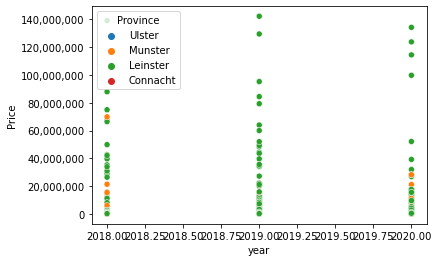

In [15]:
sns.scatterplot(x="year", 
                y="Price",
                data=houseprices,
                hue="Province",
                hue_order=["Ulster","Munster","Leinster","Connacht"])
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

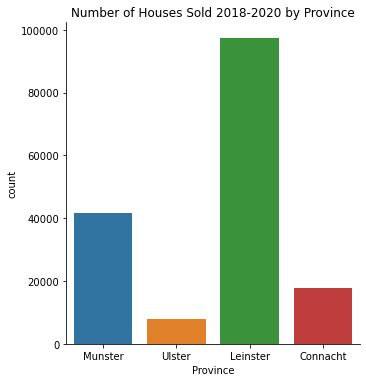

In [86]:
sns.catplot(x="Province",data=houseprices,kind="count").set(title="Number of Houses Sold 2018-2020 by Province")

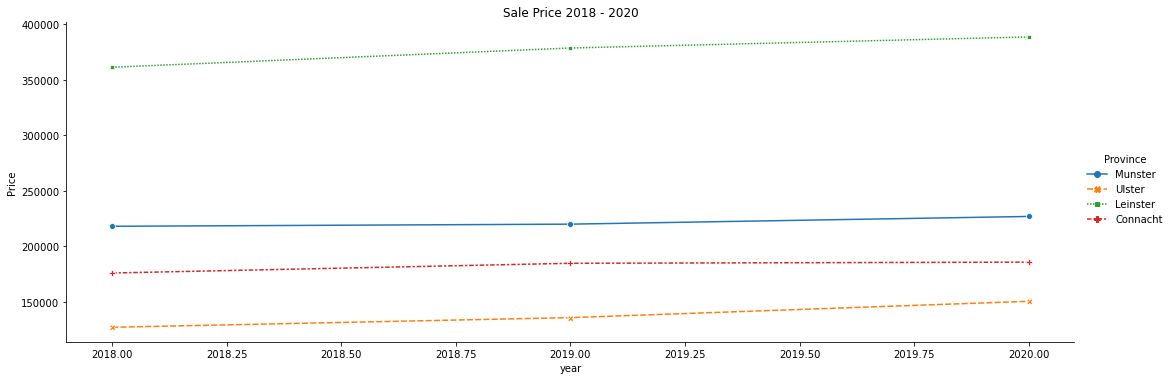

In [90]:
sns.relplot(x= "year",y="Price", 
            data=houseprices,
            kind="line",
            style="Province",
            hue="Province",
            markers=True, 
            ci=None,
            height=5, aspect=3).set(title="Sale Price 2018 - 2020")

In [89]:
#convert to DF, update price and date format
houseprices2021 = pd.read_csv('PPR-2021-2.csv',thousands=',', parse_dates=True)
houseprices2021['Date'] = pd.to_datetime(houseprices2021['Date'])
houseprices2021['year'], houseprices2021['month'] = houseprices2021['Date'].dt.year, houseprices2021['Date'].dt.month

In [26]:
#convert to DF, update price and date format
houseprices2022 = pd.read_csv('PPR-2022-2.csv',thousands=',', parse_dates=True)
houseprices2022['Date'] = pd.to_datetime(houseprices2022['Date'])
houseprices2022['year'], houseprices2022['month'] = houseprices2022['Date'].dt.year, houseprices2022['Date'].dt.month

In [27]:
#Rows/Columns and Headers
display(houseprices2021)
display(houseprices2022)

,Date,Address,County,Price,Province,year,month
0,2021-01-01,"APT 15, SANDON COVE, CASTLE AVE DUBLIN 3",Dublin,295000,Leinster,2021,1
1,2021-01-01,"APT 32, DANES COURT, CLONTARF RD DUBLIN 3",Dublin,310000,Leinster,2021,1
2,2021-03-01,"16 BURLEIGH COURT, BURLINGTON ROAD, DUBLIN 4",Dublin,450000,Leinster,2021,3
3,2021-04-01,"1 CASTLEGAL CROSS, CLIFFONEY, CO. SLIGO",Sligo,148000,Connacht,2021,4
4,2021-04-01,"1 PLAZA VIEW, FAIR GREEN, MALLOW",Cork,158590,Munster,2021,4
...,...,...,...,...,...,...,...
59438,2021-12-31,"APT 7 IVY COURT, BLOCK B IVY COURT COMPLEX, HA...",Dublin,850000,Leinster,2021,12
59439,2021-12-31,"DERREENSILLAGH, CASTLECOVE, KILLARNEY",Kerry,100000,Munster,2021,12
59440,2021-12-31,"LIOS NA GCRANN MEWS, GARDINERS HILL, CORK",Cork,275000,Munster,2021,12
59441,2021-12-31,"MOUNT JUBILEE, BANGOR ERRIS, BALLINA",Mayo,115000,Connacht,2021,12


,Date,Address,County,Price,Province,year,month
0,2022-01-01,"8 CHANDLERS GUILD, JAMESS ST, DUBLIN 8",Dublin,95000,Leinster,2022,1
1,2022-03-01,"RIVERDALE, RAHARNEY, CO. WESTMEATH",Westmeath,75000,Leinster,2022,3
2,2022-04-01,"1 BARRETTS LANE, ENNIS, CO CLARE",Clare,105000,Munster,2022,4
3,2022-04-01,"1 DELANEY MEWS, UPPER DUBLIN HILL, CORK",Cork,800000,Munster,2022,4
4,2022-04-01,"104 ARDKEEN, CAVAN",Cavan,120000,Ulster,2022,4
...,...,...,...,...,...,...,...
62303,2022-12-30,"PEPPARDS LANE, RATHKEALE, CO. LIMERICK",Limerick,30000,Munster,2022,12
62304,2022-12-31,"29 Castle Park, Killycard, Castleblayney",Monaghan,233480,Ulster,2022,12
62305,2022-12-31,"8 SOUTH LOTTS ROAD, RINGSEND, DUBLIN 4",Dublin,287500,Leinster,2022,12
62306,2022-12-31,"83 Astor Lawn, Abbey Forte, Kinsale",Cork,311400,Munster,2022,12


In [28]:
#concat the two dfs
housepricescovid=pd.concat([houseprices2021,houseprices2022],axis=0)
houseprivescovid=houseprices['Price'].round(0)

In [29]:
#Show the index and ranges 
print(houseprices2021.columns)
print(houseprices2021.index)
print(houseprices2022.columns)
print(houseprices2022.index)

Index(['Date', 'Address', 'County', 'Price', 'Province', 'year', 'month'], dtype='object')
RangeIndex(start=0, stop=59443, step=1)
Index(['Date', 'Address', 'County', 'Price', 'Province', 'year', 'month'], dtype='object')
RangeIndex(start=0, stop=62308, step=1)


In [30]:
#Convert objects to string
houseprices2022[("Province")]=houseprices2022[("Province")].astype('string')
houseprices2021[("Province")]=houseprices2021[("Province")].astype('string')

In [31]:
#Check the data and null values
houseprices2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62308 entries, 0 to 62307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      62308 non-null  datetime64[ns]
 1   Address   62308 non-null  object        
 2   County    62308 non-null  object        
 3   Price     62308 non-null  int64         
 4   Province  62308 non-null  string        
 5   year      62308 non-null  int64         
 6   month     62308 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2), string(1)
memory usage: 3.3+ MB


In [32]:
#Check the data and null values
houseprices2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59443 entries, 0 to 59442
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      59443 non-null  datetime64[ns]
 1   Address   59443 non-null  object        
 2   County    59443 non-null  object        
 3   Price     59443 non-null  int64         
 4   Province  59443 non-null  string        
 5   year      59443 non-null  int64         
 6   month     59443 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2), string(1)
memory usage: 3.2+ MB


In [33]:

houseprices2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59443 entries, 0 to 59442
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      59443 non-null  datetime64[ns]
 1   Address   59443 non-null  object        
 2   County    59443 non-null  object        
 3   Price     59443 non-null  int64         
 4   Province  59443 non-null  string        
 5   year      59443 non-null  int64         
 6   month     59443 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2), string(1)
memory usage: 3.2+ MB


In [34]:
#Convert to objects to ssting
houseprices2022[("Province")]=houseprices2022[("Province")].astype('string')

In [35]:
houseprices2022

,Date,Address,County,Price,Province,year,month
0,2022-01-01,"8 CHANDLERS GUILD, JAMESS ST, DUBLIN 8",Dublin,95000,Leinster,2022,1
1,2022-03-01,"RIVERDALE, RAHARNEY, CO. WESTMEATH",Westmeath,75000,Leinster,2022,3
2,2022-04-01,"1 BARRETTS LANE, ENNIS, CO CLARE",Clare,105000,Munster,2022,4
3,2022-04-01,"1 DELANEY MEWS, UPPER DUBLIN HILL, CORK",Cork,800000,Munster,2022,4
4,2022-04-01,"104 ARDKEEN, CAVAN",Cavan,120000,Ulster,2022,4
...,...,...,...,...,...,...,...
62303,2022-12-30,"PEPPARDS LANE, RATHKEALE, CO. LIMERICK",Limerick,30000,Munster,2022,12
62304,2022-12-31,"29 Castle Park, Killycard, Castleblayney",Monaghan,233480,Ulster,2022,12
62305,2022-12-31,"8 SOUTH LOTTS ROAD, RINGSEND, DUBLIN 4",Dublin,287500,Leinster,2022,12
62306,2022-12-31,"83 Astor Lawn, Abbey Forte, Kinsale",Cork,311400,Munster,2022,12


In [36]:
#Drop duplicates from df
housepricescovid.drop_duplicates(subset=["Address","year"])

,Date,Address,County,Price,Province,year,month
0,2021-01-01,"APT 15, SANDON COVE, CASTLE AVE DUBLIN 3",Dublin,295000,Leinster,2021,1
1,2021-01-01,"APT 32, DANES COURT, CLONTARF RD DUBLIN 3",Dublin,310000,Leinster,2021,1
2,2021-03-01,"16 BURLEIGH COURT, BURLINGTON ROAD, DUBLIN 4",Dublin,450000,Leinster,2021,3
3,2021-04-01,"1 CASTLEGAL CROSS, CLIFFONEY, CO. SLIGO",Sligo,148000,Connacht,2021,4
4,2021-04-01,"1 PLAZA VIEW, FAIR GREEN, MALLOW",Cork,158590,Munster,2021,4
...,...,...,...,...,...,...,...
62303,2022-12-30,"PEPPARDS LANE, RATHKEALE, CO. LIMERICK",Limerick,30000,Munster,2022,12
62304,2022-12-31,"29 Castle Park, Killycard, Castleblayney",Monaghan,233480,Ulster,2022,12
62305,2022-12-31,"8 SOUTH LOTTS ROAD, RINGSEND, DUBLIN 4",Dublin,287500,Leinster,2022,12
62306,2022-12-31,"83 Astor Lawn, Abbey Forte, Kinsale",Cork,311400,Munster,2022,12


In [109]:
#groupby two values
houseprices.groupby(["Province","year"])["Price"].mean()

Province  year
Connacht  2018    176059.726897
          2019    184819.538939
          2020    185846.436903
Leinster  2018    361411.127940
          2019    378743.670821
          2020    388714.414247
Munster   2018    218145.694660
          2019    220074.909663
          2020    227010.470963
Ulster    2018    127168.362532
          2019    135874.542570
          2020    150564.506971
Name: Price, dtype: float64

In [37]:
housepricescovid.pivot_table(values="Price", index="Province", columns="year", 
                        fill_value=0, margins=True).round(0)

year,2021,2022,All
Province,,,
Connacht,205459.0,237565.0,221522.0
Leinster,421554.0,459552.0,441176.0
Munster,243983.0,285204.0,264941.0
Ulster,163550.0,192939.0,178254.0
All,338376.0,378418.0,358868.0


<AxesSubplot:xlabel='year', ylabel='Price'>

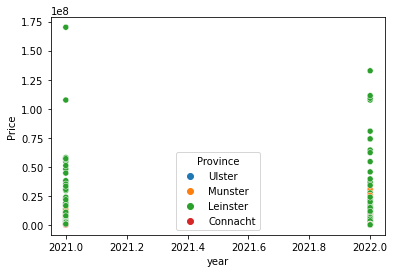

In [38]:
sns.scatterplot(x="year", 
                y="Price",
                data=housepricescovid,
                hue="Province",
                hue_order=["Ulster","Munster","Leinster","Connacht"])

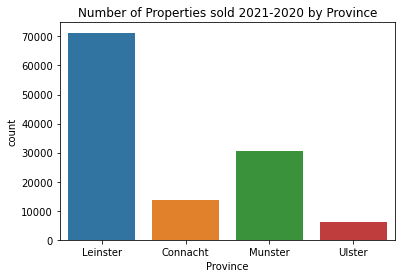

In [108]:
sns.countplot(x="Province",data=housepricescovid).set(title="Number of Properties sold 2021-2020 by Province")
plt.show()

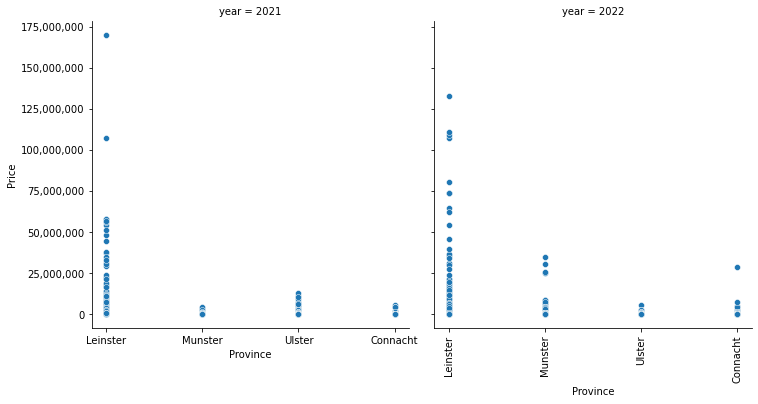

In [40]:
sns.relplot(x="Province",y="Price", data=housepricescovid,kind="scatter",col="year")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.show()

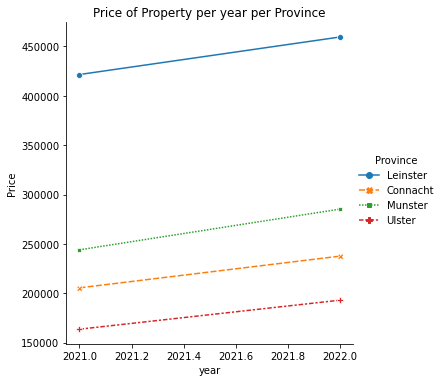

In [92]:
sns.relplot(x="year",
            y="Price", 
            data=housepricescovid,
            kind="line",
            style="Province",
            hue="Province",
            markers=True, ci=None).set(title="Price of Property per year per Province")

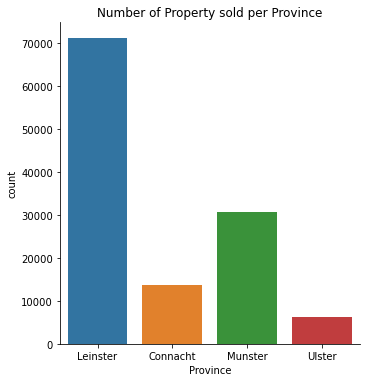

In [93]:
sns.catplot(x="Province",data=housepricescovid,kind="count").set(title="Number of Property sold per Province 2021 to 2020")

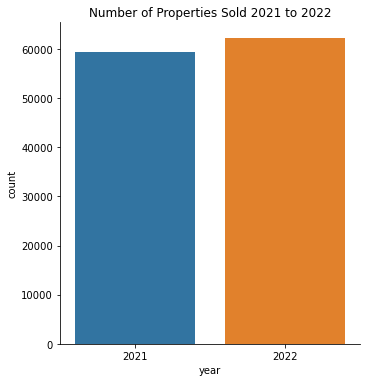

In [94]:
sns.catplot(x="year",data=housepricescovid,kind="count").set(title="Number of Properties Sold 2021 to 2022")

In [63]:
houseprices2=pd.concat([houseprices,housepricescovid],axis=0)

In [46]:
houseprices2.info

<bound method DataFrame.info of              Date                                       Address     County  \
0      2021-01-01      APT 15, SANDON COVE, CASTLE AVE DUBLIN 3     Dublin   
1      2021-01-01     APT 32, DANES COURT, CLONTARF RD DUBLIN 3     Dublin   
2      2021-03-01  16 BURLEIGH COURT, BURLINGTON ROAD, DUBLIN 4     Dublin   
3      2021-04-01       1 CASTLEGAL CROSS, CLIFFONEY, CO. SLIGO      Sligo   
4      2021-04-01             1 PLAZA  VIEW, FAIR GREEN, MALLOW       Cork   
...           ...                                           ...        ...   
165049 2020-12-31               25 TOWER VIEW, BALLINROBE, MAYO       Mayo   
165050 2020-12-31            54 STONEBRIDGE, RATOATH, CO. MEATH      Meath   
165051 2020-12-31                OAKVALE HOUSE, APT, BARRACK ST  Roscommon   
165052 2020-12-31         21 MARLFIELD, ENNISCORTHY, CO WEXFORD    Wexford   
165053 2020-12-31                  PIPPIN, WYNDHAM AVENUE, BRAY    Wicklow   

           Price  Province  yea

In [64]:
houseprices2.head()

,Date,Price,Address,County,Province,year,month
0,2018-02-01,115000.0,"239 BLARNEY ST, CORK, CORK",Cork,Munster,2018,2
1,2018-02-01,361233.0,"3 CCOLROE COURT, BALLINCOLLIG",Cork,Munster,2018,2
2,2018-02-01,365000.0,"38 THE CRESCENT, CASTLE ROCK, BANESHANE",Cork,Munster,2018,2
3,2018-02-01,230000.0,"4 LIOS NA GREINE, SOUTH DOUGLAS RD, CORK",Cork,Munster,2018,2
4,2018-02-01,228000.0,"NO 6 THE COURTYARD, FOTA ISLAND, CARRIGETWOHIL",Cork,Munster,2018,2


(array([2017.5, 2018. , 2018.5, 2019. , 2019.5, 2020. , 2020.5, 2021. ,
        2021.5, 2022. , 2022.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

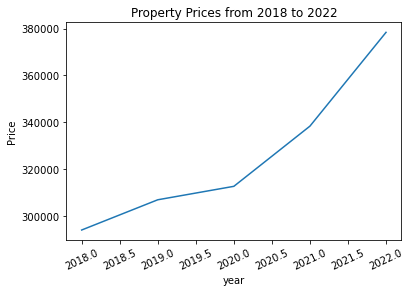

In [95]:
sns.lineplot(x = "year", y = "Price",
             data = houseprices2,
             ci=None).set(title="Property Prices from 2018 to 2022")
  
plt.xticks(rotation = 25)

(array([2017.5, 2018. , 2018.5, 2019. , 2019.5, 2020. , 2020.5, 2021. ,
        2021.5, 2022. , 2022.5]),
 [Text(2017.5, 0, '2017.5'),
  Text(2018.0, 0, '2018.0'),
  Text(2018.5, 0, '2018.5'),
  Text(2019.0, 0, '2019.0'),
  Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5'),
  Text(2021.0, 0, '2021.0'),
  Text(2021.5, 0, '2021.5'),
  Text(2022.0, 0, '2022.0'),
  Text(2022.5, 0, '2022.5')])

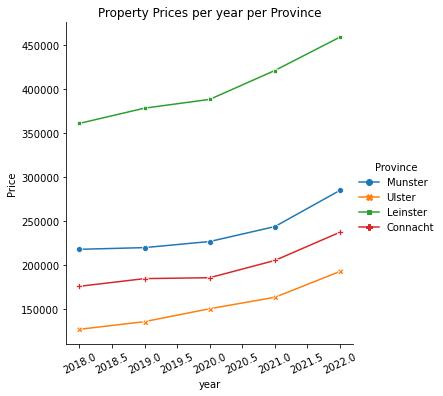

In [103]:
sns.relplot(x="year",y="Price", 
            data=houseprices2,
            kind="line",
            style="Province",
            hue="Province",
            markers=True,
            dashes=False,
            ci=None).set(title='Property Prices per year per Province')
plt.xticks(rotation=25)

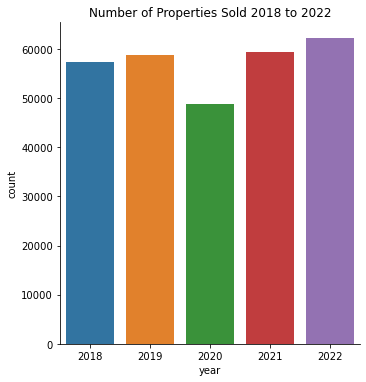

In [99]:
sns.catplot(x="year",data=houseprices2,kind="count").set(title="Number of Properties Sold 2018 to 2022")

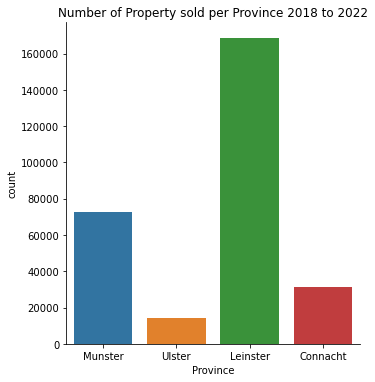

In [104]:
sns.catplot(x="Province",data=houseprices2,kind="count").set(title="Number of Property sold per Province 2018 to 2022")

<function matplotlib.pyplot.show(close=None, block=None)>

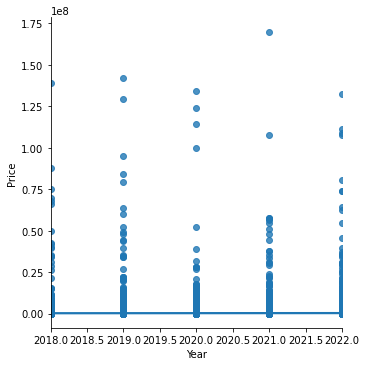

In [107]:
sns.lmplot(x='year',y='Price',data=houseprices2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show